# Section 10: Metaparameters (activations, optimizers)

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

## The "wine quality" dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
for key in data.keys():
    print(f"{key} has {len(np.unique(data[key]))} unique values")

fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


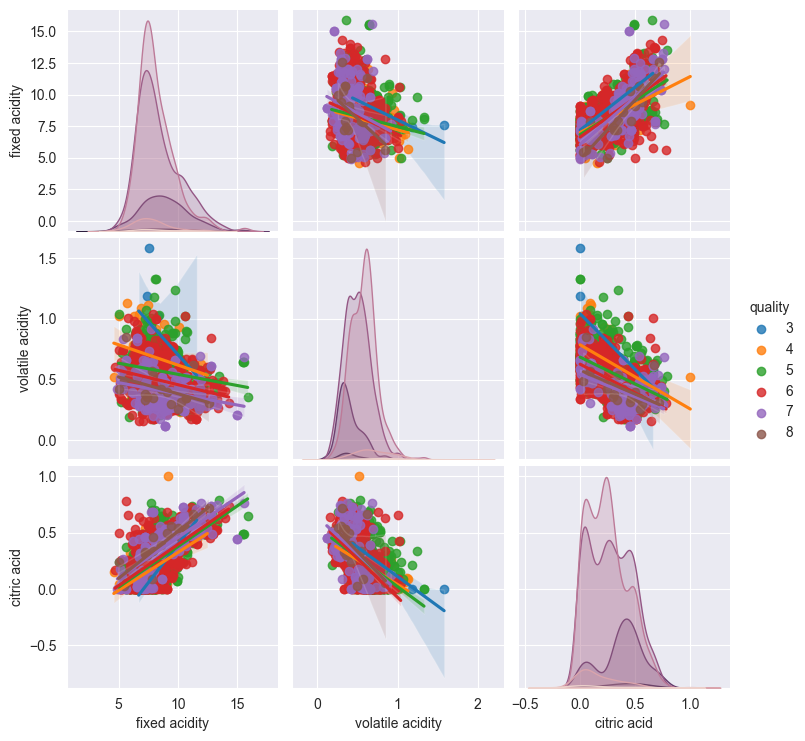

In [5]:
columns_to_plot = ["fixed acidity", "volatile acidity", "citric acid", 'quality']

sns.pairplot(data[columns_to_plot], kind='reg', hue='quality')
plt.show()

In [6]:
data = data[data["total sulfur dioxide"] < 200]

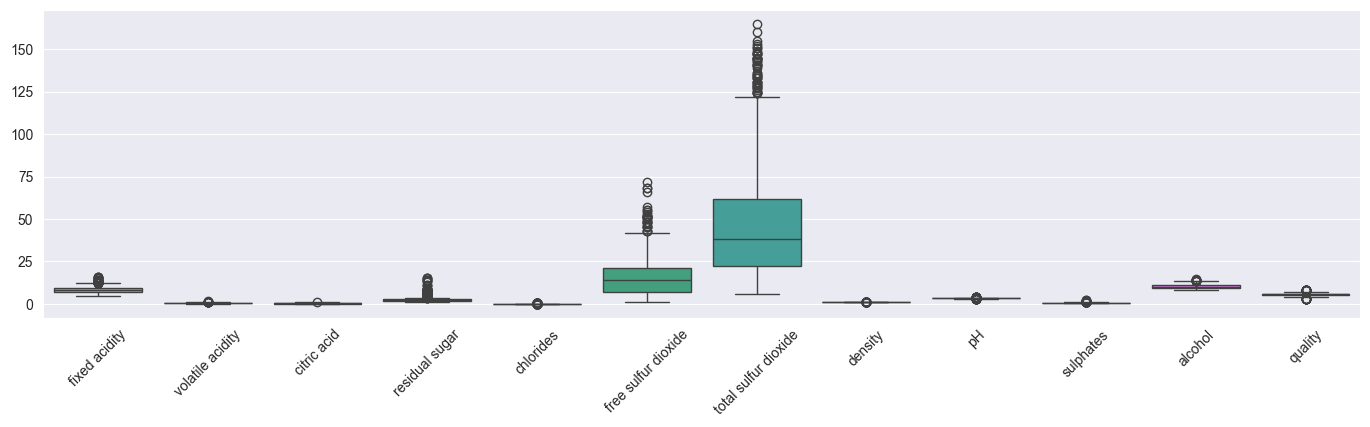

In [7]:
plt.subplots(1, figsize=(17, 4))

ax = sns.boxplot(data=data)

plt.xticks(rotation=45)
plt.show()

In [8]:
data = data.copy()
columns_to_z_score = data.keys()
columns_to_z_score = columns_to_z_score.drop('quality')

for column in columns_to_z_score:
    mean_value = np.mean(data[column])
    standard_deviation = np.std(data[column], ddof=1)
    data[column] = (data[column] - mean_value) / standard_deviation
    
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000
mean,1.779694e-17,1.156801e-16,1.779694e-17,-7.563699e-17,-1.512740e-16,-1.779694e-17,-7.118775e-17,-8.357442e-14,3.025479e-16,8.008622e-17,-5.872989e-16,5.634314
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.806630
min,-2.135419e+00,-2.280048e+00,-1.391387e+00,-1.168783e+00,-1.604073e+00,-1.422392e+00,-1.262186e+00,-3.545821e+00,-3.708218e+00,-1.936711e+00,-1.898626e+00,3.000000
25%,-7.003882e-01,-7.715838e-01,-9.283861e-01,-4.524372e-01,-3.720247e-01,-8.476045e-01,-7.594598e-01,-6.109478e-01,-6.585382e-01,-6.390204e-01,-8.650444e-01,5.000000
50%,-2.411785e-01,-4.528645e-02,-5.382836e-02,-2.375335e-01,-1.808448e-01,-1.770192e-01,-2.567340e-01,-6.214425e-04,-9.670044e-03,-2.261189e-01,-2.073106e-01,6.000000
75%,5.050372e-01,6.251419e-01,7.692848e-01,4.900487e-02,5.281955e-02,4.935662e-01,4.973546e-01,5.778618e-01,5.743113e-01,4.227263e-01,6.383472e-01,6.000000
max,4.350918e+00,5.876831e+00,3.753070e+00,9.289866e+00,1.112001e+01,5.379259e+00,3.733652e+00,3.682565e+00,4.532407e+00,7.913939e+00,4.208902e+00,8.000000


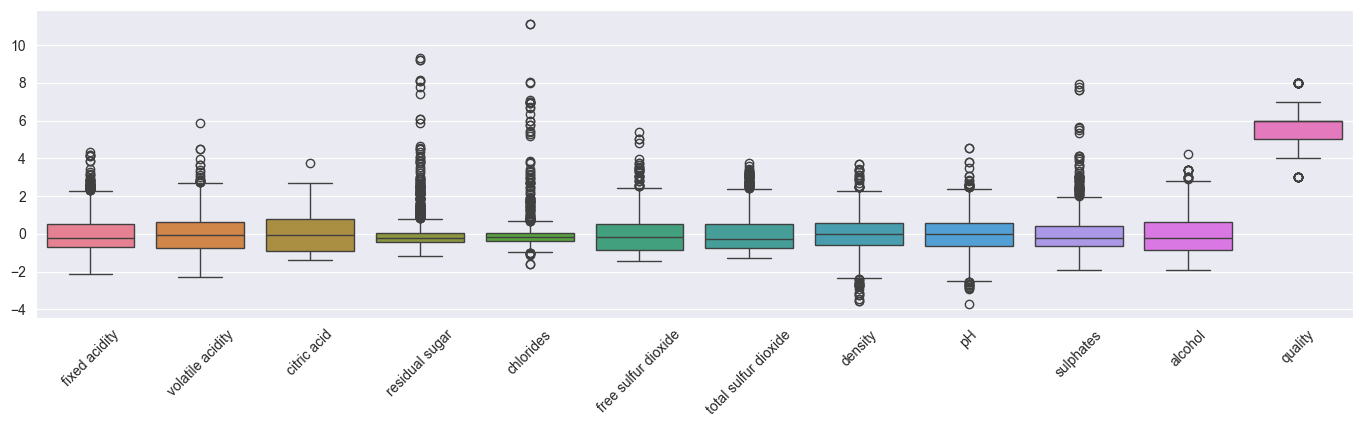

In [9]:
plt.subplots(1, figsize=(17, 4))

ax = sns.boxplot(data=data)

plt.xticks(rotation=45)
plt.show()

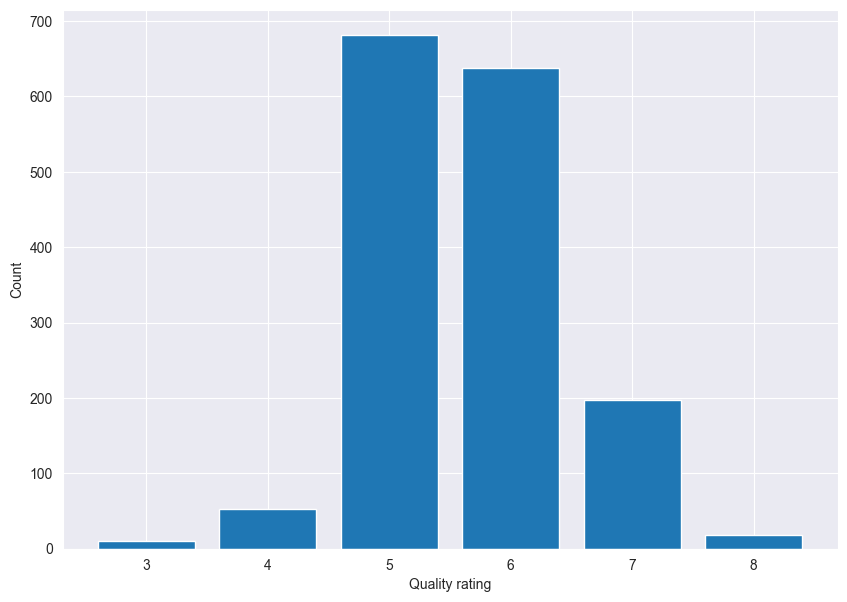

In [10]:
plt.figure(figsize=(10, 7)) 

counts = data['quality'].value_counts()

plt.bar(list(counts.keys()), counts)
plt.xlabel("Quality rating")
plt.ylabel('Count')
plt.show()

In [11]:
data['bool_quality'] = 0
data.loc[data['quality'] > 5, 'bool_quality'] = 1

data[['quality', 'bool_quality']]

,quality,bool_quality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [12]:
X = torch.tensor(data[columns_to_z_score].values).float()
y = torch.tensor(data['bool_quality'].values).float()
y = y[:, None]

print(X.shape)
print(y.shape)

torch.Size([1597, 11])
torch.Size([1597, 1])


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

X_y_train = TensorDataset(X_train, y_train)
X_y_test = TensorDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(X_y_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(X_y_test, batch_size=X_y_test.tensors[0].shape[0])

In [14]:
for X, y in train_loader:
    print(X.shape, y.shape)

torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])


## CodeChallenge: Minibatch size in the wine dataset

In [15]:
def create_model():
     ann_local = nn.Sequential(
          nn.Linear(11, 16),
          nn.ReLU(),
          nn.Linear(16, 32),
          nn.ReLU(),
          nn.Linear(32, 32),
          nn.ReLU(),
          nn.Linear(32, 1),
     )
     loss_fun_local = nn.BCEWithLogitsLoss()
     optimizer_local = torch.optim.SGD(ann_local.parameters(), lr=.01)
     
     return ann_local, loss_fun_local, optimizer_local

def train_model(ann_iris_param, loss_fun_param, optimizer_param, epochs_param):
     train_accuracies_local = []
     test_accuracies_local = []
     losses_local = []
     
     for epoch in range(epochs_param):
          batch_accuracies = []
          batch_losses = []
         
          ann_iris_param.train()
         
          for X_local, y_local in train_loader:
               y_pred = ann_iris_param(X_local)
               loss = loss_fun_param(y_pred, y_local)
               
               optimizer_param.zero_grad()
               loss.backward()
               optimizer_param.step()
             
               correct_predictions = ((y_pred > 0) == y_local).float()
             
               batch_accuracies.append(100 * torch.mean(correct_predictions).item())
               batch_losses.append(loss.item())
             
          train_accuracies_local.append(np.mean(batch_accuracies))
          losses_local.append(np.mean(batch_losses))
    
          ann_iris_param.eval()
          
          X_local, y_local = next(iter(test_loader))
          
          with torch.no_grad():
               y_pred = ann_iris_param(X_local)
          
          correct_predictions = ((y_pred > 0) == y_local).float()
          
          test_accuracies_local.append(100 * torch.mean(correct_predictions).item())
     
     return train_accuracies_local, test_accuracies_local, losses_local

In [16]:
epochs = 500
batch_sizes = [2, 8, 32, 128, 512]
train_accuracies_results = np.zeros((epochs, len(batch_sizes)))
test_accuracies_results = np.zeros((epochs, len(batch_sizes)))
computation_time = np.zeros(len(batch_sizes))
test_loader = DataLoader(X_y_test, batch_size=X_y_test.tensors[0].shape[0])

for i, batch_size in enumerate(batch_sizes):
     train_loader = DataLoader(X_y_train, batch_size=int(batch_size), shuffle=True, drop_last=True)
     ann_iris, loss_fun, optimizer = create_model()
     start = time.time()
     train_accuracies, test_accuracies, _ = train_model(ann_iris, loss_fun, optimizer, epochs)
     end = time.time()
     computation_time[i] = end - start
     train_accuracies_results[:, i] = train_accuracies
     test_accuracies_results[:, i] = test_accuracies

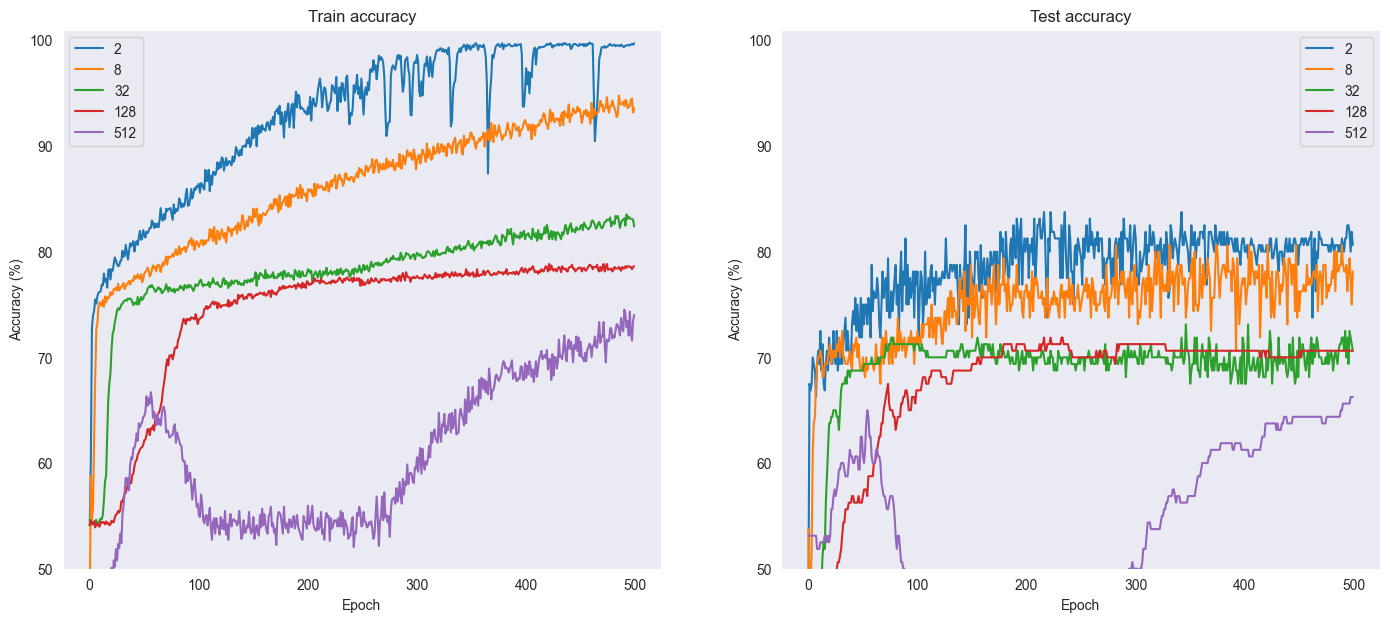

In [17]:
_, ax = plt.subplots(1, 2, figsize=(17, 7))

ax[0].plot(train_accuracies_results)
ax[0].set_title("Train accuracy")
ax[1].plot(test_accuracies_results)
ax[1].set_title("Test accuracy")

for i in range(2):
     ax[i].legend(batch_sizes)
     ax[i].set_xlabel('Epoch')
     ax[i].set_ylabel("Accuracy (%)")
     ax[i].set_ylim([50, 101])
     ax[i].grid()
     
plt.show()

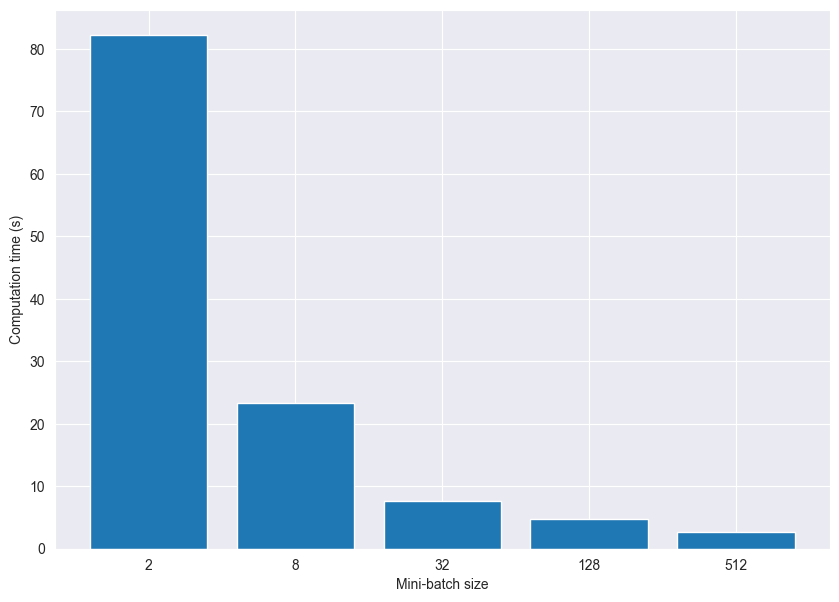

In [18]:
batch_size_labels = [str(batch_size) for batch_size in batch_sizes]

plt.figure(figsize=(10, 7))
plt.bar(batch_size_labels, computation_time)
plt.xlabel("Mini-batch size")
plt.ylabel("Computation time (s)")
plt.show()

## Batch normalization in practice

In [19]:
X = torch.tensor(data[columns_to_z_score].values).float()
y = torch.tensor(data['bool_quality'].values).float()
y = y[:, None]

print(X.shape)
print(y.shape)

torch.Size([1597, 11])
torch.Size([1597, 1])


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

X_y_train = TensorDataset(X_train, y_train)
X_y_test = TensorDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(X_y_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(X_y_test, batch_size=X_y_test.tensors[0].shape[0])

In [21]:
class AnnWineWithBatchNorm(nn.Module):
     def __init__(self):
          super().__init__()
          
          self.input = nn.Linear(11, 16)
          self.batch_norm_1 = nn.BatchNorm1d(16)
          self.fully_connected_1 = nn.Linear(16, 32)
          self.batch_norm_2 = nn.BatchNorm1d(32)
          self.fully_connected_2 = nn.Linear(32, 20)
          self.output = nn.Linear(20, 1)
          
     def forward(self, x, is_with_batch_normalization):
          x = F.relu(self.input(x))
          
          if is_with_batch_normalization:
               x = self.batch_norm_1(x)
               x = self.fully_connected_1(x)
               x = F.relu(x)
               x = self.batch_norm_2(x)
               x = self.fully_connected_2(x)
               x = F.relu(x)
          else:
               x = self.fully_connected_1(x)
               x = F.relu(x)
               x = self.fully_connected_2(x)
               x = F.relu(x)
               
          return self.output(x)

In [22]:
def train_model(model_param, epochs_param, is_with_batch_normalization=True):
     loss_fun_local = nn.BCEWithLogitsLoss()
     optimizer_local = torch.optim.SGD(model_param.parameters(), lr=.01)
     
     train_accuracies_local = []
     test_accuracies_local = []
     losses_local = []
     
     for epoch in range(epochs_param):
          batch_accuracies = []
          batch_losses = []
         
          model_param.train()
         
          for X_local, y_local in train_loader:
               y_pred = model_param(X_local, is_with_batch_normalization)
               loss = loss_fun_local(y_pred, y_local)
               
               optimizer_local.zero_grad()
               loss.backward()
               optimizer_local.step()
             
               correct_predictions = ((y_pred > 0) == y_local).float()
             
               batch_accuracies.append(100 * torch.mean(correct_predictions).item())
               batch_losses.append(loss.item())
             
          train_accuracies_local.append(np.mean(batch_accuracies))
          losses_local.append(np.mean(batch_losses))
    
          model_param.eval()
          
          X_local, y_local = next(iter(test_loader))
          
          with torch.no_grad():
               y_pred = model_param(X_local, is_with_batch_normalization)
          
          correct_predictions = ((y_pred > 0) == y_local).float()
          
          test_accuracies_local.append(100 * torch.mean(correct_predictions).item())
     
     return train_accuracies_local, test_accuracies_local, losses_local

In [23]:
epochs = 1000
ann_wine = AnnWineWithBatchNorm()

train_accuracies_no, test_accuracies_no, losses_no = train_model(ann_wine, epochs, False)

ann_wine = AnnWineWithBatchNorm()

train_accuracies_with, test_accuracies_with, losses_with = train_model(ann_wine, epochs, True)

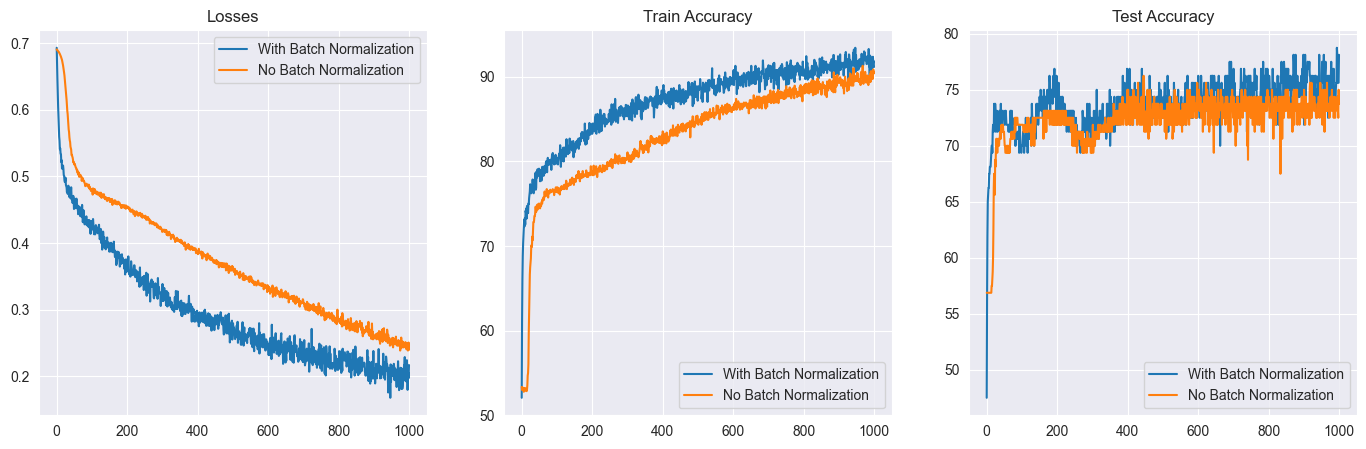

In [24]:
_, ax = plt.subplots(1, 3, figsize=(17, 5))

ax[0].plot(losses_with, label="With Batch Normalization")
ax[0].plot(losses_no, label="No Batch Normalization")
ax[0].set_title('Losses')
ax[0].legend()

ax[1].plot(train_accuracies_with, label="With Batch Normalization")
ax[1].plot(train_accuracies_no, label="No Batch Normalization")
ax[1].set_title("Train Accuracy")
ax[1].legend()

ax[2].plot(test_accuracies_with, label="With Batch Normalization")
ax[2].plot(test_accuracies_no, label="No Batch Normalization")
ax[2].set_title("Test Accuracy")
ax[2].legend()

plt.show()

## CodeChallenge: Batch-normalize the qwerties

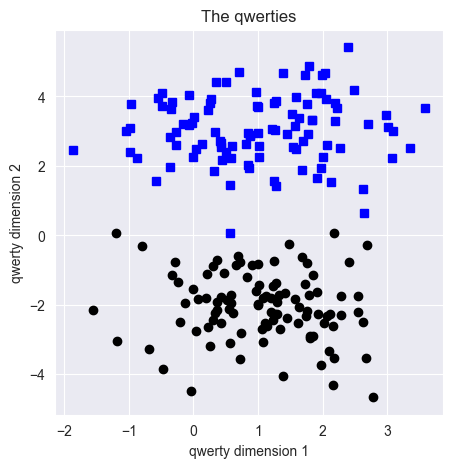

In [25]:
n_per_cluster = 100
blur = 1
A = [1, 3]
B = [1, -2]
a = [A[0] + np.random.randn(n_per_cluster) * blur, A[1] + np.random.randn(n_per_cluster) * blur]
b = [B[0] + np.random.randn(n_per_cluster) * blur, B[1] + np.random.randn(n_per_cluster) * blur]
labels_np = np.vstack((np.zeros((n_per_cluster, 1)), np.ones((n_per_cluster, 1))))
data_np = np.hstack((a, b)).T
y = torch.tensor(labels_np).float()
x = torch.tensor(data_np).float()

plt.figure(figsize=(5, 5))
plt.plot(x[np.where(y == 0)[0], 0], x[np.where(y == 0)[0], 1], 'bs')
plt.plot(x[np.where(y == 1)[0], 0], x[np.where(y == 1)[0], 1], 'ko')
plt.title("The qwerties")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

In [26]:
def create_ann_model(learning_rate_param):
    ann_classification_local = nn.Sequential(
        nn.Linear(2, 16),
        nn.ReLU(),
        nn.BatchNorm1d(16),
        nn.Linear(16, 1),
        nn.ReLU(),
        nn.Linear(1, 1),
        nn.Sigmoid(),
    )
    loss_function_local = nn.BCELoss()
    optimizer_local = torch.optim.SGD(ann_classification_local.parameters(), learning_rate_param)
    
    return ann_classification_local, loss_function_local, optimizer_local

def train_the_model(ann_classification_param, loss_function_param, optimizer_param):
    losses_local = torch.zeros(epochs)
    
    for epoch_local in range(epochs):
        y_pred_local = ann_classification_param(x)
        loss_local = loss_function_param(y_pred_local, y)
        losses_local[epoch_local] = loss_local    
        
        optimizer_param.zero_grad()
        loss_local.backward()
        optimizer_param.step()
        
    y_final_pred_local = ann_classification_param(x) > .5
    total_accuracy_local = 100 * torch.mean((y_final_pred_local == y).float())
    
    return losses_local, y_final_pred_local, total_accuracy_local 

In [27]:
learning_rates = np.linspace(.001, .1, 50)
accuracy_by_learning_rate = []
all_losses = np.zeros((len(learning_rates), epochs))

for i, learning_rate, in enumerate(learning_rates):
    ann_classification, loss_function, optimizer = create_ann_model(.01)
    losses, y_final_pred, total_accuracy = train_the_model(ann_classification, loss_function, optimizer)
    
    accuracy_by_learning_rate.append(total_accuracy)
    all_losses[i, :] = losses.detach()

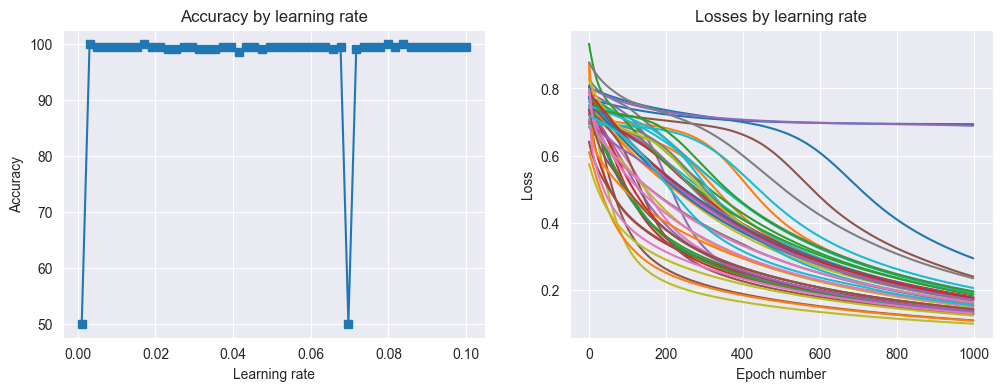

In [28]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(learning_rates, accuracy_by_learning_rate, 's-')
ax[0].set_xlabel("Learning rate")
ax[0].set_ylabel('Accuracy')
ax[0].set_title("Accuracy by learning rate")
ax[1].plot(all_losses.T)
ax[1].set_xlabel("Epoch number")
ax[1].set_ylabel('Loss')
ax[1].set_title("Losses by learning rate")
plt.show()

## Activation functions in PyTorch

In [29]:
x = torch.linspace(-3, 3, 101)

def get_activation_function_output(activation_function_name, x_param):
    activation_function_local = getattr(torch, activation_function_name)
    
    return activation_function_local(x_param)

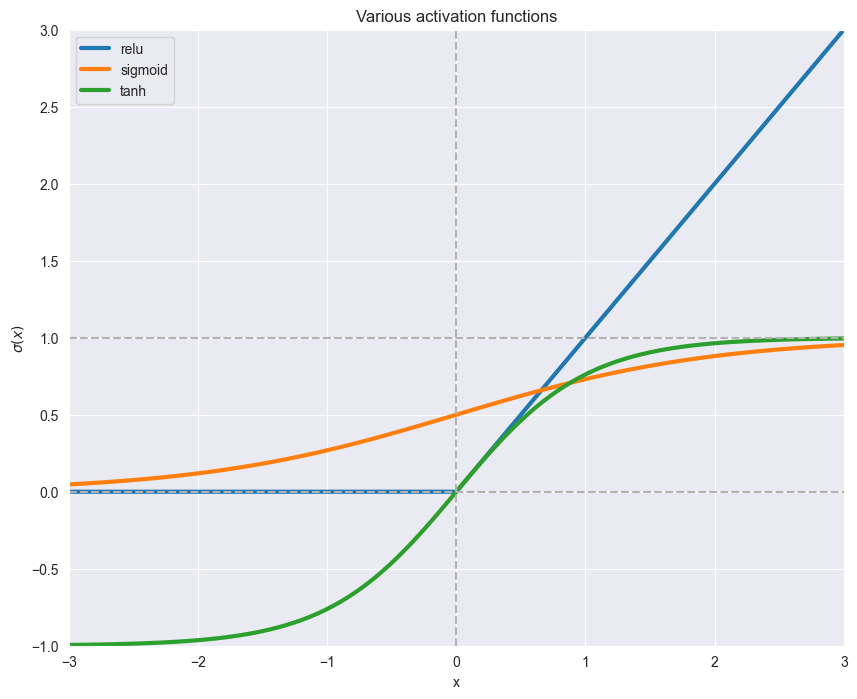

In [30]:
activation_functions = ['relu', 'sigmoid', 'tanh']

plt.figure(figsize=(10, 8))

for activation_function in activation_functions:
    plt.plot(x, get_activation_function_output(activation_function, x), label=activation_function, linewidth=3)
    
dash_line_color = [.7, .7, .7]

plt.plot(x[[0, -1]], [0, 0], '--', color=dash_line_color)
plt.plot(x[[0, -1]], [1, 1], '--', color=dash_line_color)
plt.plot([0, 0], [-1, 3], '--', color=dash_line_color)

plt.legend()
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.title("Various activation functions")
plt.xlim(x[[0, -1]])
plt.ylim([-1, 3])
plt.show()

In [31]:
def get_activation_function(activation_function_name):
    activation_function_local = getattr(torch.nn, activation_function_name)
    
    return activation_function_local()

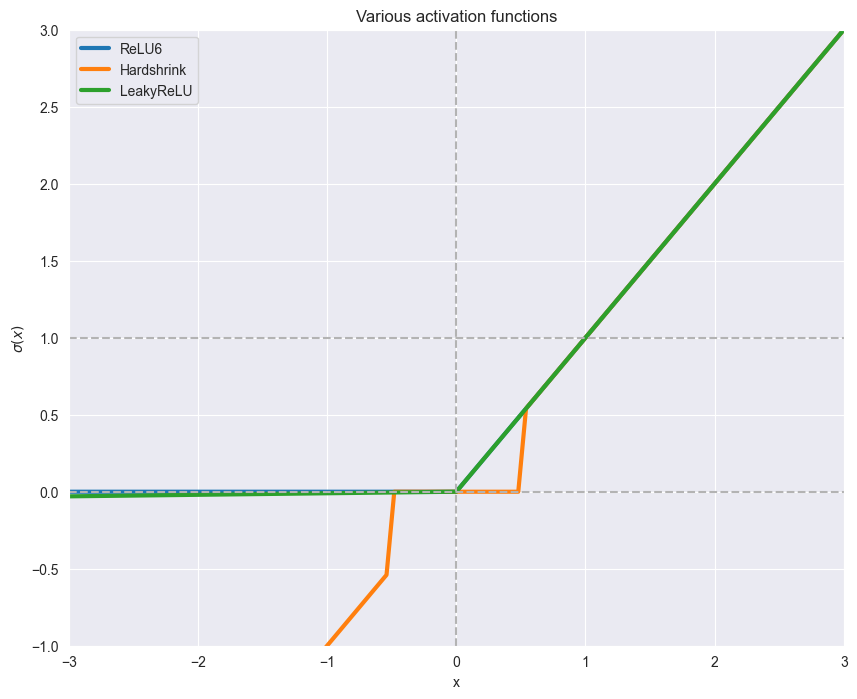

In [32]:
activation_functions = ['ReLU6', 'Hardshrink', 'LeakyReLU']

plt.figure(figsize=(10, 8))

for activation_function in activation_functions:
    plt.plot(x, get_activation_function(activation_function)(x), label=activation_function, linewidth=3)
    
dash_line_color = [.7, .7, .7]

plt.plot(x[[0, -1]], [0, 0], '--', color=dash_line_color)
plt.plot(x[[0, -1]], [1, 1], '--', color=dash_line_color)
plt.plot([0, 0], [-1, 3], '--', color=dash_line_color)

plt.legend()
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.title("Various activation functions")
plt.xlim(x[[0, -1]])
plt.ylim([-1, 3])
plt.show()

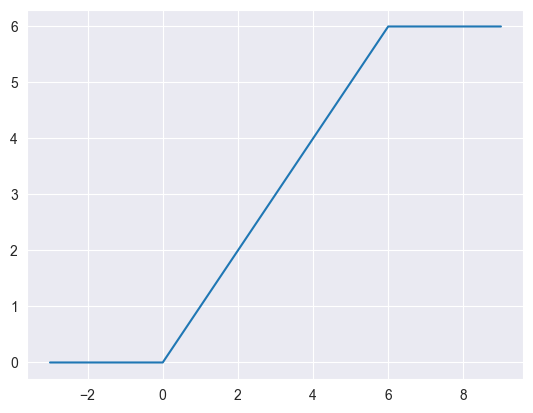

In [33]:
x = torch.linspace(-3, 9, 101)
relu_6 = torch.nn.ReLU6()

plt.plot(x, relu_6(x))
plt.show()

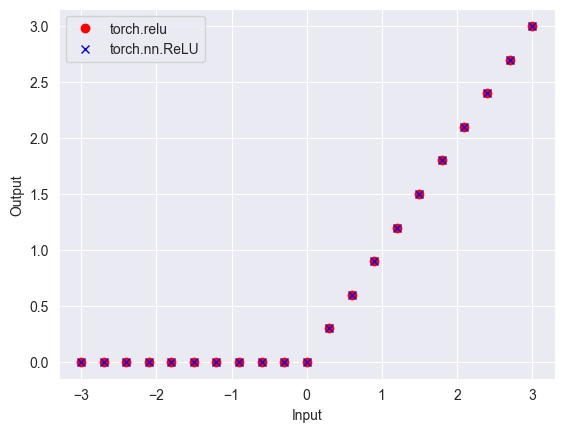

In [34]:
x = torch.linspace(-3, 3, 21)
y1 = torch.relu(x)
f = torch.nn.ReLU()
y2 = f(x)

plt.plot(x, y1, 'ro', label='torch.relu')
plt.plot(x, y2, 'bx', label='torch.nn.ReLU')
plt.legend()
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

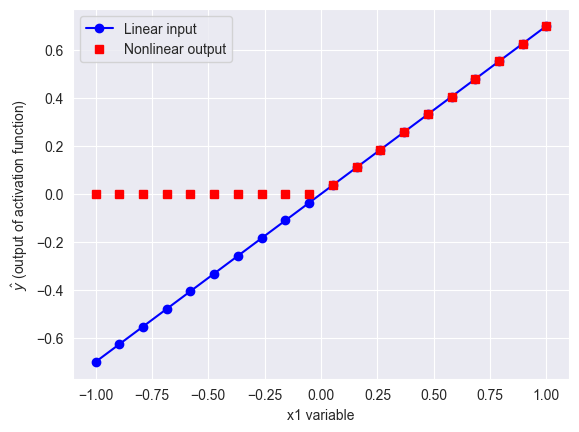

In [35]:
x_1 = torch.linspace(-1, 1, 20)
x_2 = 2 * x_1

w_1 = -.3
w_2 = .5

linear_part = x_1 * w_1 + x_2 * w_2
y = torch.relu(linear_part)

plt.plot(x_1, linear_part, 'bo-', label="Linear input")
plt.plot(x_1, y, 'rs', label="Nonlinear output")
plt.xlabel("x1 variable")
plt.ylabel("$\\hat{y}$ (output of activation function)")
plt.legend()
plt.show()

## Activation functions comparison

In [36]:
X = torch.tensor(data[columns_to_z_score].values).float()
y = torch.tensor(data['bool_quality'].values).float()
y = y[:, None]

print(X.shape)
print(y.shape)

torch.Size([1597, 11])
torch.Size([1597, 1])


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

X_y_train = TensorDataset(X_train, y_train)
X_y_test = TensorDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(X_y_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(X_y_test, batch_size=X_y_test.tensors[0].shape[0])

In [38]:
class AnnWine(nn.Module):
    def __init__(self, activation_function_param):
        super().__init__()
        
        self.input = nn.Linear(11, 16)
        self.fully_connected_1 = nn.Linear(16, 32)
        self.fully_connected_2 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 1)
        self.activation_function = activation_function_param
        
    def forward(self, x_param):
        activation_function_local = getattr(torch, self.activation_function)
        
        x_local = self.input(x_param)
        x_local = activation_function_local(x_local)
        x_local = self.fully_connected_1(x_local)
        x_local = activation_function_local(x_local)
        x_local = self.fully_connected_2(x_local)
        x_local = activation_function_local(x_local)
        x_local = self.output(x_local)
        
        return x_local

In [39]:
ann_wine = AnnWine('sigmoid')

ann_wine(torch.randn(10, 11)).shape

torch.Size([10, 1])

In [40]:
def train_model(model_param, epochs_param):
     loss_fun_local = nn.BCEWithLogitsLoss()
     optimizer_local = torch.optim.SGD(model_param.parameters(), lr=.01)
     
     train_accuracies_local = []
     test_accuracies_local = []
     losses_local = []
     
     for epoch in range(epochs_param):
          batch_accuracies = []
          batch_losses = []
         
          model_param.train()
         
          for X_local, y_local in train_loader:
               y_pred = model_param(X_local)
               loss = loss_fun_local(y_pred, y_local)
               
               optimizer_local.zero_grad()
               loss.backward()
               optimizer_local.step()
             
               correct_predictions = ((y_pred > 0) == y_local).float()
             
               batch_accuracies.append(100 * torch.mean(correct_predictions).item())
               batch_losses.append(loss.item())
             
          train_accuracies_local.append(np.mean(batch_accuracies))
          losses_local.append(np.mean(batch_losses))
    
          model_param.eval()
          
          X_local, y_local = next(iter(test_loader))
          
          with torch.no_grad():
               y_pred = model_param(X_local)
          
          correct_predictions = ((y_pred > 0) == y_local).float()
          
          test_accuracies_local.append(100 * torch.mean(correct_predictions).item())
     
     return train_accuracies_local, test_accuracies_local, losses_local

In [41]:
activation_functions = ['relu', 'tanh', 'sigmoid']
epochs = 1000

train_accuracies = np.zeros((epochs, len(activation_functions)))
test_accuracies = np.zeros((epochs, len(activation_functions)))

for i, activation_function in enumerate(activation_functions):
    ann_wine = AnnWine(activation_function)
    train_accuracies[:, i], test_accuracies[:, i], _ = train_model(ann_wine, epochs)

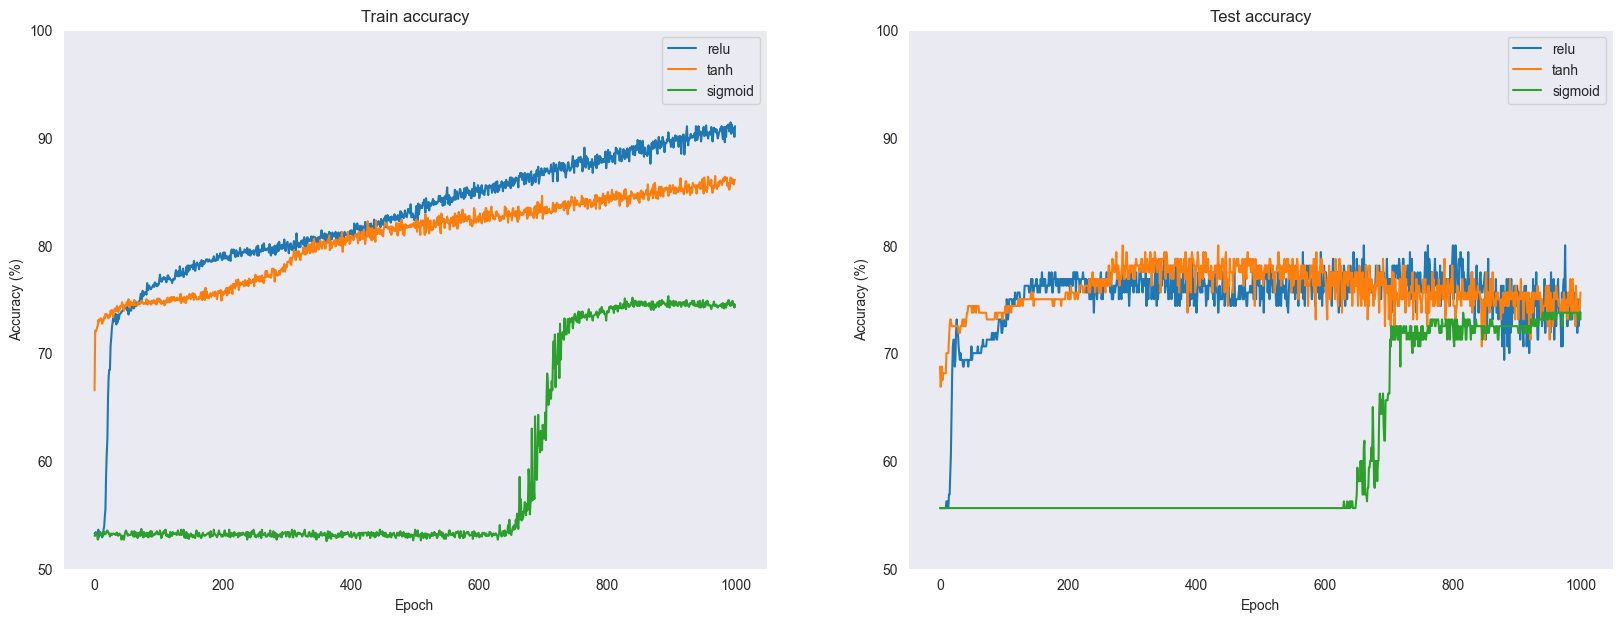

In [42]:
_, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].plot(train_accuracies)
ax[0].set_title("Train accuracy")
ax[1].plot(test_accuracies)
ax[1].set_title("Test accuracy")

for i in range(2):
    ax[i].legend(activation_functions)
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel("Accuracy (%)")
    ax[i].set_ylim([50, 100])
    ax[i].grid()
    
plt.show()

## CodeChallenge: Compare relu variants

In [43]:
class AnnWine(nn.Module):
    def __init__(self, activation_function_param):
        super().__init__()
        
        self.input = nn.Linear(11, 16)
        self.fully_connected_1 = nn.Linear(16, 32)
        self.fully_connected_2 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 1)
        self.activation_function = activation_function_param
        
    def forward(self, x_param):
        activation_function_local = getattr(torch.nn, self.activation_function)
        
        x_local = self.input(x_param)
        x_local = activation_function_local()(x_local)
        x_local = self.fully_connected_1(x_local)
        x_local = activation_function_local()(x_local)
        x_local = self.fully_connected_2(x_local)
        x_local = activation_function_local()(x_local)
        x_local = self.output(x_local)
        
        return x_local

In [44]:
activation_functions = ['ReLU', 'ReLU6', 'LeakyReLU']
epochs = 1000

train_accuracies = np.zeros((epochs, len(activation_functions)))
test_accuracies = np.zeros((epochs, len(activation_functions)))

for i, activation_function in enumerate(activation_functions):
    ann_wine = AnnWine(activation_function)
    train_accuracies[:, i], test_accuracies[:, i], _ = train_model(ann_wine, epochs)

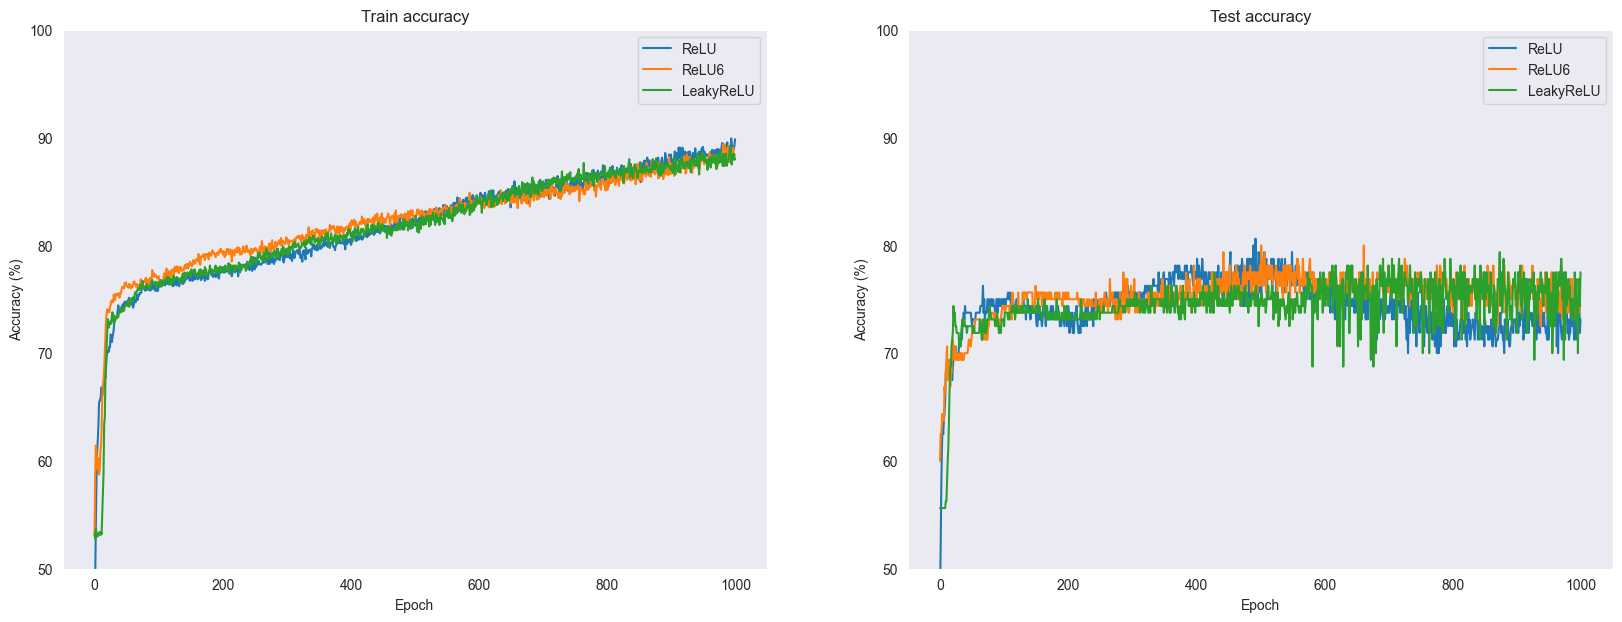

In [45]:
_, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].plot(train_accuracies)
ax[0].set_title("Train accuracy")
ax[1].plot(test_accuracies)
ax[1].set_title("Test accuracy")

for i in range(2):
    ax[i].legend(activation_functions)
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel("Accuracy (%)")
    ax[i].set_ylim([50, 100])
    ax[i].grid()
    
plt.show()

## CodeChallenge: Predict sugar

In [46]:
data = pd.read_csv(url, sep=';')
data = data[data["total sulfur dioxide"] < 200]
data = data.copy()
columns_to_z_score = data.keys()

for column in columns_to_z_score:
    mean_value = np.mean(data[column])
    standard_deviation = np.std(data[column], ddof=1)
    data[column] = (data[column] - mean_value) / standard_deviation
    
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03
mean,1.779694e-17,1.156801e-16,1.779694e-17,-7.563699e-17,-1.512740e-16,-1.779694e-17,-7.118775e-17,-8.357442e-14,3.025479e-16,8.008622e-17,-5.872989e-16,3.470403e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.135419e+00,-2.280048e+00,-1.391387e+00,-1.168783e+00,-1.604073e+00,-1.422392e+00,-1.262186e+00,-3.545821e+00,-3.708218e+00,-1.936711e+00,-1.898626e+00,-3.265829e+00
25%,-7.003882e-01,-7.715838e-01,-9.283861e-01,-4.524372e-01,-3.720247e-01,-8.476045e-01,-7.594598e-01,-6.109478e-01,-6.585382e-01,-6.390204e-01,-8.650444e-01,-7.863762e-01
50%,-2.411785e-01,-4.528645e-02,-5.382836e-02,-2.375335e-01,-1.808448e-01,-1.770192e-01,-2.567340e-01,-6.214425e-04,-9.670044e-03,-2.261189e-01,-2.073106e-01,4.533501e-01
75%,5.050372e-01,6.251419e-01,7.692848e-01,4.900487e-02,5.281955e-02,4.935662e-01,4.973546e-01,5.778618e-01,5.743113e-01,4.227263e-01,6.383472e-01,4.533501e-01
max,4.350918e+00,5.876831e+00,3.753070e+00,9.289866e+00,1.112001e+01,5.379259e+00,3.733652e+00,3.682565e+00,4.532407e+00,7.913939e+00,4.208902e+00,2.932803e+00


In [47]:
X = torch.tensor(data[columns_to_z_score.drop("residual sugar")].values).float()
y = torch.tensor(data["residual sugar"].values).float()
y = y[:, None]

print(X.shape)
print(y.shape)

torch.Size([1597, 11])
torch.Size([1597, 1])


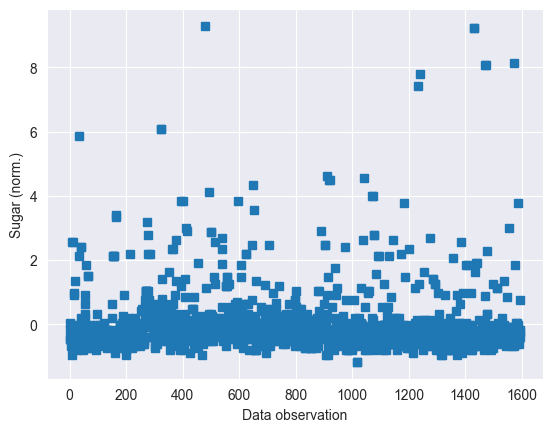

In [48]:
plt.plot(y, 's')
plt.xlabel("Data observation")
plt.ylabel("Sugar (norm.)")
plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

X_y_train = TensorDataset(X_train, y_train)
X_y_test = TensorDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(X_y_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(X_y_test, batch_size=X_y_test.tensors[0].shape[0])

In [50]:
def create_model():
    ann_local = nn.Sequential(
        nn.Linear(11, 16),
        nn.ReLU(),
        nn.Linear(16, 32),
        nn.ReLU(),
        nn.Linear(32, 32),
        nn.ReLU(),
        nn.Linear(32, 1),
    )
    loss_fun_local = nn.MSELoss()
    optimizer_local = torch.optim.SGD(ann_local.parameters(), lr=.01)

    return ann_local, loss_fun_local, optimizer_local


def train_model(ann_wine_param, loss_fun_param, optimizer_param, epochs_param):
    batch_losses_local = []
    train_losses_local = []
    test_losses_local = []

    for epoch in range(epochs_param):
        ann_wine_param.train()

        for X_local, y_local in train_loader:
            y_pred_local = ann_wine_param(X_local)
            loss = loss_fun_param(y_pred_local, y_local)

            optimizer_param.zero_grad()
            loss.backward()
            optimizer_param.step()

            batch_losses_local.append(loss.item())

        train_losses_local.append(np.mean(batch_losses_local))

        ann_wine_param.eval()

        X_local, y_local = next(iter(test_loader))

        with torch.no_grad():
            y_pred_local = ann_wine_param(X_local)
            loss = loss_fun_param(y_pred_local, y_local)
            
            test_losses_local.append(loss.item())

    return train_losses_local, test_losses_local

In [51]:
epochs = 1000

ann_wine, loss_fun, optimizer = create_model()
train_losses, test_losses = train_model(ann_wine, loss_fun, optimizer, epochs)

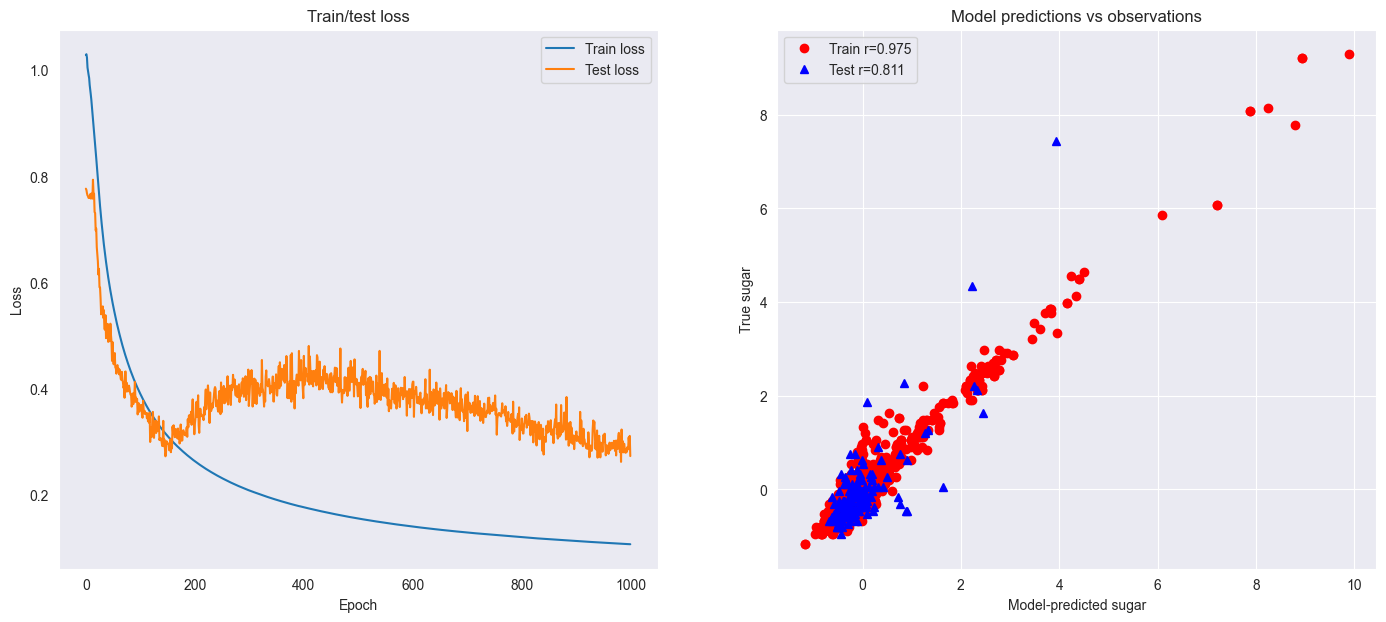

In [52]:
_, ax = plt.subplots(1, 2, figsize=(17, 7))

ax[0].plot(train_losses, label="Train loss")
ax[0].plot(test_losses, label="Test loss")
ax[0].set_title("Train/test loss")
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid()

train_y_pred = ann_wine(X_train).detach()
test_y_pred = ann_wine(X_test).detach()
ax[1].plot(train_y_pred, y_train, 'ro')
ax[1].plot(test_y_pred, y_test, 'b^')
ax[1].set_xlabel("Model-predicted sugar")
ax[1].set_ylabel("True sugar")
ax[1].set_title("Model predictions vs observations")

train_correlation = np.corrcoef(train_y_pred.T, y_train.T)[1, 0]
test_correlation = np.corrcoef(test_y_pred.T, y_test.T)[1, 0]

ax[1].legend([f"Train r={train_correlation:.3f}", f"Test r={test_correlation:.3f}"])

plt.show()

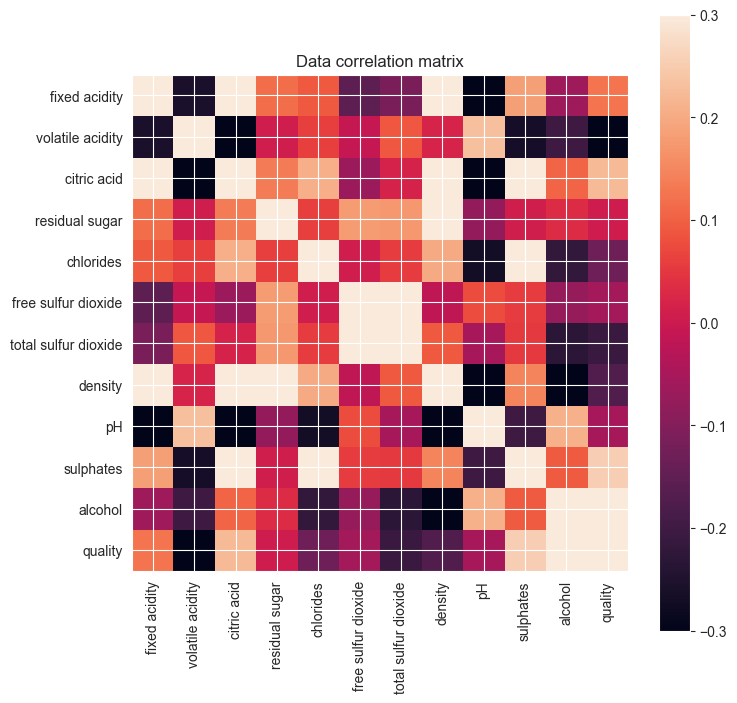

In [53]:
plt.figure(figsize=(8, 8))
plt.imshow(np.corrcoef(data.T), vmin=-.3, vmax=.3)
plt.xticks(range(len(data.keys())), labels=data.keys(), rotation=90)
plt.yticks(range(len(data.keys())), labels=data.keys())
plt.colorbar()
plt.title("Data correlation matrix")
plt.show()

## Loss functions in PyTorch

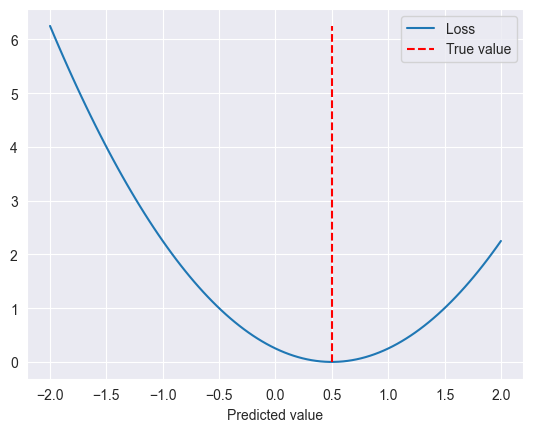

In [54]:
mse_loss_function = nn.MSELoss()

y = torch.tensor(.5)
y_pred = torch.linspace(-2, 2, 101)

losses = np.zeros(101)

for i, y_pred_local in enumerate(y_pred):
    losses[i] = mse_loss_function(y_pred_local, y)
    
plt.plot(y_pred, losses, label='Loss')
plt.plot([y, y], [0, np.max(losses)], 'r--', label="True value")
plt.xlabel("Predicted value")
plt.legend()
plt.show()

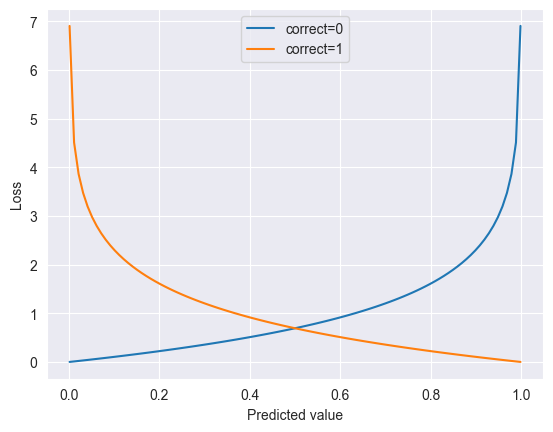

In [55]:
bce_loss_function = nn.BCELoss()

y_1 = torch.tensor(0.)
y_2 = torch.tensor(1.)
y_pred = torch.linspace(.001, .999, 101)

losses = np.zeros((101, 2))

for i, y_pred_local in enumerate(y_pred):
    losses[i, 0] = bce_loss_function(y_pred_local, y_1)
    losses[i, 1] = bce_loss_function(y_pred_local, y_2)
    
plt.plot(y_pred, losses)
plt.xlabel("Predicted value")
plt.ylabel('Loss')
plt.legend(["correct=0", "correct=1"])
plt.show() 

In [56]:
cce_loss_function = nn.CrossEntropyLoss()

y_pred = torch.tensor([[1., 4, 3]])

for i in range(3):
    correct_answer = torch.tensor([i])
    loss = cce_loss_function(y_pred, correct_answer).item()
    
    print("Loss when correct answer is %g: %g" %(i, loss))

Loss when correct answer is 0: 3.34901
Loss when correct answer is 1: 0.349012
Loss when correct answer is 2: 1.34901


In [57]:
softmax = nn.Softmax(dim=1)
softmax_y_pred = softmax(y_pred)

for i in range(3):
    correct_answer = torch.tensor([i])
    loss = cce_loss_function(softmax_y_pred, correct_answer).item()
    
    print("Loss when correct answer is %g: %g" %(i, loss))

Loss when correct answer is 0: 1.43658
Loss when correct answer is 1: 0.766318
Loss when correct answer is 2: 1.21221


In [58]:
log_softmax = nn.LogSoftmax(dim=1)
log_softmax_y_pred = log_softmax(y_pred)

print(y_pred)
print(softmax_y_pred)
print(log_softmax_y_pred)

tensor([[1., 4., 3.]])
tensor([[0.0351, 0.7054, 0.2595]])
tensor([[-3.3490, -0.3490, -1.3490]])


In [59]:
class CustomLossFunction(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x_param, y_param):
        return torch.abs(x_param - y_param)

custom_loss_function = CustomLossFunction()

print(custom_loss_function(torch.tensor(4), torch.tensor(5.2)))

tensor(1.2000)


## More practice with multioutput ANNs

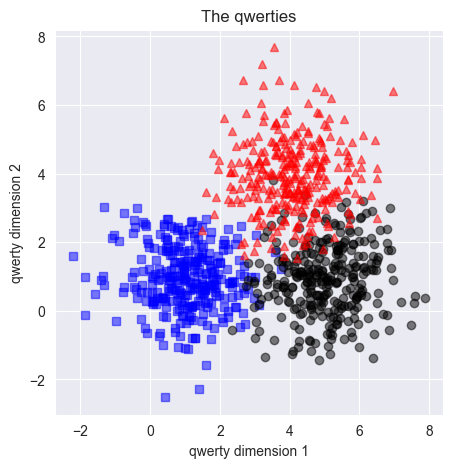

In [60]:
entities_per_cluster = 300
blur = 1

A = [1, 1]
B = [5, 1]
C = [4, 4]

a = [A[0] + np.random.randn(entities_per_cluster) * blur, A[1] + np.random.randn(entities_per_cluster) * blur]
b = [B[0] + np.random.randn(entities_per_cluster) * blur, B[1] + np.random.randn(entities_per_cluster) * blur]
c = [C[0] + np.random.randn(entities_per_cluster) * blur, C[1] + np.random.randn(entities_per_cluster) * blur]

X_np = np.hstack((a, b, c)).T
y_np = np.hstack((np.zeros(entities_per_cluster), np.ones(entities_per_cluster), np.ones(entities_per_cluster) + 1))
X = torch.tensor(X_np).float()
y = torch.tensor(y_np).long()

plt.figure(figsize=(5, 5))
plt.plot(X[np.where(y==0)[0], 0], X[np.where(y==0)[0], 1], 'bs', alpha=.5)
plt.plot(X[np.where(y==1)[0], 0], X[np.where(y==1)[0], 1], 'ko', alpha=.5)
plt.plot(X[np.where(y==2)[0], 0], X[np.where(y==2)[0], 1], 'r^', alpha=.5)
plt.title("The qwerties")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

X_y_train = TensorDataset(X_train, y_train)
X_y_test = TensorDataset(X_test, y_test)

batch_size = 16
train_loader = DataLoader(X_y_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(X_y_test, batch_size=X_y_test.tensors[0].shape[0])

In [62]:
print(f"There are {len(train_loader)} batches, each with {batch_size} samples.")

There are 50 batches, each with 16 samples.


In [63]:
def create_model():
    class AnnQwerty(nn.Module):
        def __init__(self):
            super().__init__()
            
            self.input = nn.Linear(2, 8)
            self.fully_connected_1 = nn.Linear(8, 8)
            self.output = nn.Linear(8, 3)
            
        def forward(self, x_param):
            x_local = self.input(x_param)
            x_local = F.relu(x_local)
            x_local = self.fully_connected_1(x_local)
            x_local = F.relu(x_local)
            x_local = self.output(x_local)
            
            return x_local
        
    ann_qwerty_local = AnnQwerty()
    loss_function_local = nn.CrossEntropyLoss()
    optimizer_local = torch.optim.SGD(ann_qwerty_local.parameters(), lr=.01)
    
    return ann_qwerty_local, loss_function_local, optimizer_local

In [64]:
ann_qwerty, loss_function, optimizer = create_model()

print(ann_qwerty)
print()
print(ann_qwerty(torch.randn(10, 2)))

AnnQwerty(
  (input): Linear(in_features=2, out_features=8, bias=True)
  (fully_connected_1): Linear(in_features=8, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=3, bias=True)
)

tensor([[ 0.0549,  0.0221,  0.3600],
        [ 0.2452, -0.1362,  0.2008],
        [ 0.1729, -0.0755,  0.3188],
        [-0.1506,  0.1677,  0.4141],
        [ 0.1556, -0.0768,  0.3337],
        [ 0.1642, -0.1089,  0.3374],
        [-0.1991,  0.2194,  0.4262],
        [-0.0369,  0.0584,  0.3743],
        [-0.1862,  0.1824,  0.4323],
        [ 0.2272, -0.1138,  0.2392]], grad_fn=<AddmmBackward0>)


In [65]:
def train_model(model_param, loss_fun_param, optimizer_param, epochs_param):
     train_accuracies_local = []
     test_accuracies_local = []
     losses_local = []
     
     for epoch in range(epochs_param):
          batch_accuracies = []
          batch_losses = []
         
          model_param.train()
         
          for X_local, y_local in train_loader:
               y_pred = model_param(X_local)
               loss = loss_fun_param(y_pred, y_local)
               
               optimizer_param.zero_grad()
               loss.backward()
               optimizer_param.step()
             
               correct_predictions = (torch.argmax(y_pred, axis=1) == y_local).float()
             
               batch_accuracies.append(100 * torch.mean(correct_predictions).item())
               batch_losses.append(loss.item())
             
          train_accuracies_local.append(np.mean(batch_accuracies))
          losses_local.append(np.mean(batch_losses))
    
          model_param.eval()
          
          X_local, y_local = next(iter(test_loader))
          
          with torch.no_grad():
               y_pred = model_param(X_local)
          
          correct_predictions = (torch.argmax(y_pred, axis=1) == y_local).float()
          
          test_accuracies_local.append(100 * torch.mean(correct_predictions).item())
     
     return train_accuracies_local, test_accuracies_local, losses_local

In [66]:
epochs = 100
train_accuracies, test_accuracies, losses = train_model(ann_qwerty, loss_function, optimizer, epochs)

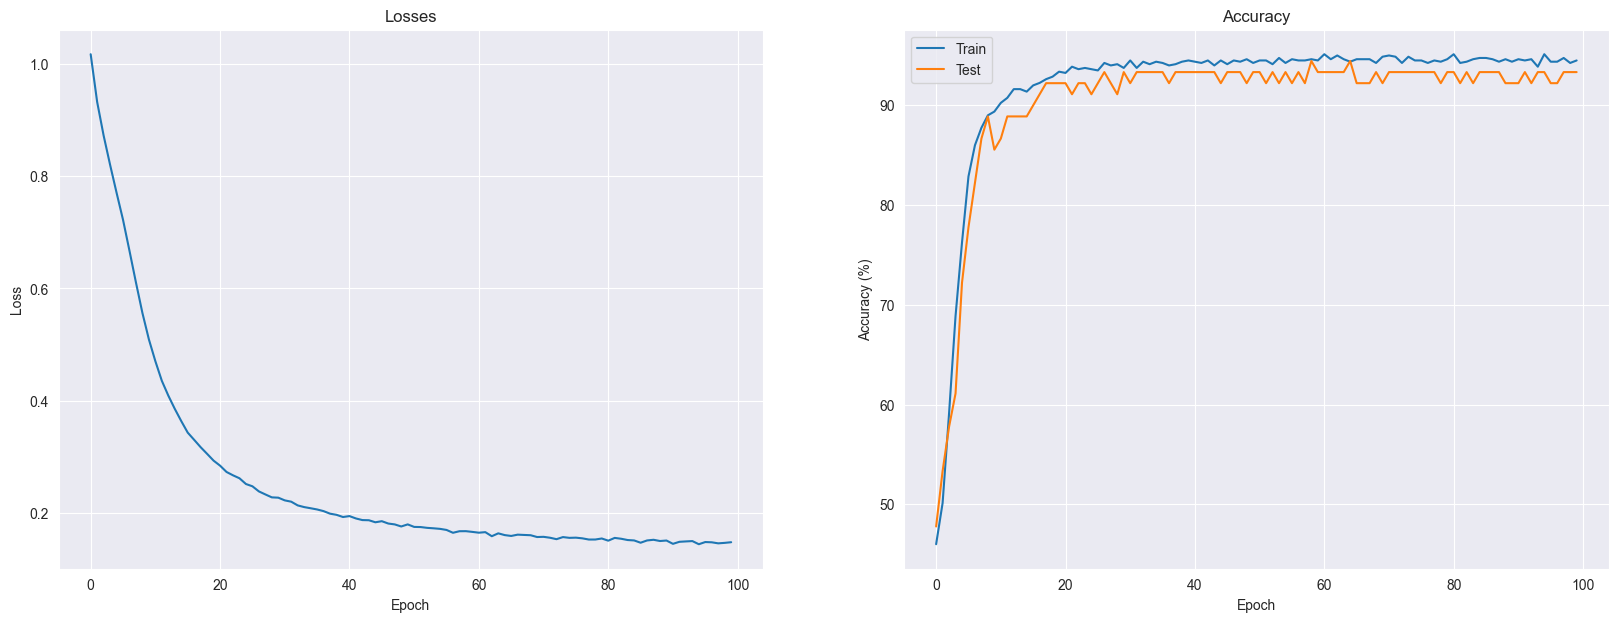

In [67]:
_, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].plot(losses)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Losses')

ax[1].plot(train_accuracies, label='Train')
ax[1].plot(test_accuracies, label='Test')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_title('Accuracy')
ax[1].legend()

plt.show()

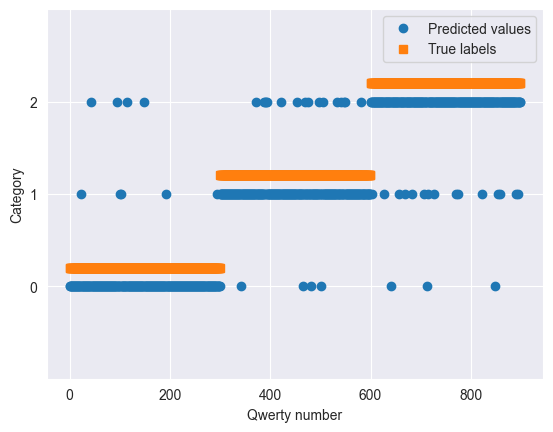

In [68]:
y_pred = ann_qwerty(X)

plt.plot(torch.argmax(y_pred, axis=1), 'o', label="Predicted values")
plt.plot(y + .2, 's', label="True labels")
plt.xlabel("Qwerty number")
plt.ylabel('Category')
plt.yticks([0, 1, 2])
plt.ylim([-1, 3])
plt.legend()
plt.show()

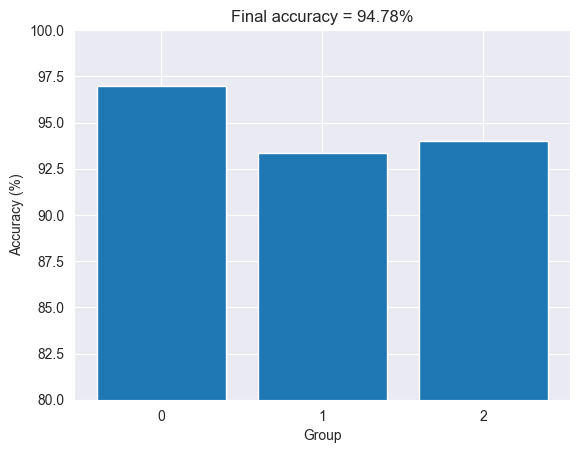

In [69]:
accuracy = (torch.argmax(y_pred, axis=1) == y).float()
total_accuracy = torch.mean(100 * accuracy).item()
accuracy_by_group = np.zeros(3)

for i in range(3):
    accuracy_by_group[i] = 100 * torch.mean(accuracy[y == i])
    
plt.bar(range(3), accuracy_by_group)
plt.ylim([80, 100])
plt.xticks([0, 1, 2])
plt.xlabel('Group')
plt.ylabel("Accuracy (%)")
plt.title(f"Final accuracy = {total_accuracy:.2f}%")
plt.show()

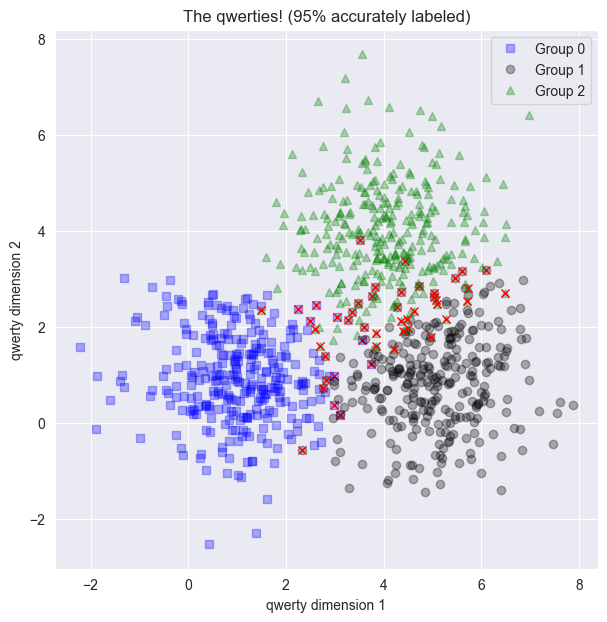

In [70]:
color_shapes = ['bs', 'ko', 'g^']

plt.figure(figsize=(7, 7))

for i in range(3):
    plt.plot(X[y==i, 0], X[y==i, 1], color_shapes[i], alpha=.3, label=f"Group {i}")

    error_indices = (accuracy == 0) & (y == i)
    
    plt.plot(X[error_indices, 0], X[error_indices, 1], 'rx')

plt.title(f"The qwerties! ({total_accuracy:.0f}% accurately labeled)")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.legend()
plt.show()

## SGD with momentum

In [71]:
def create_model(momentum_param):
    class AnnQwerty(nn.Module):
        def __init__(self):
            super().__init__()
            
            self.input = nn.Linear(2, 8)
            self.fully_connected_1 = nn.Linear(8, 8)
            self.output = nn.Linear(8, 3)
            
        def forward(self, x_param):
            x_local = self.input(x_param)
            x_local = F.relu(x_local)
            x_local = self.fully_connected_1(x_local)
            x_local = F.relu(x_local)
            x_local = self.output(x_local)
            
            return x_local
        
    ann_qwerty_local = AnnQwerty()
    loss_function_local = nn.CrossEntropyLoss()
    optimizer_local = torch.optim.SGD(ann_qwerty_local.parameters(), lr=.01, momentum=momentum_param)
    
    return ann_qwerty_local, loss_function_local, optimizer_local

In [72]:
epochs = 50
momentums = [0, .5, .9, .95, .999]
results = np.zeros((epochs, len(momentums), 3))

for i, momentum in enumerate(momentums):
    ann_qwerty, loss_function, optimizer = create_model(momentum)
    train_accuracies, test_accuracies, losses = train_model(ann_qwerty, loss_function, optimizer, epochs)
    
    results[:, i, 0] = losses
    results[:, i, 1] = train_accuracies
    results[:, i, 2] = test_accuracies

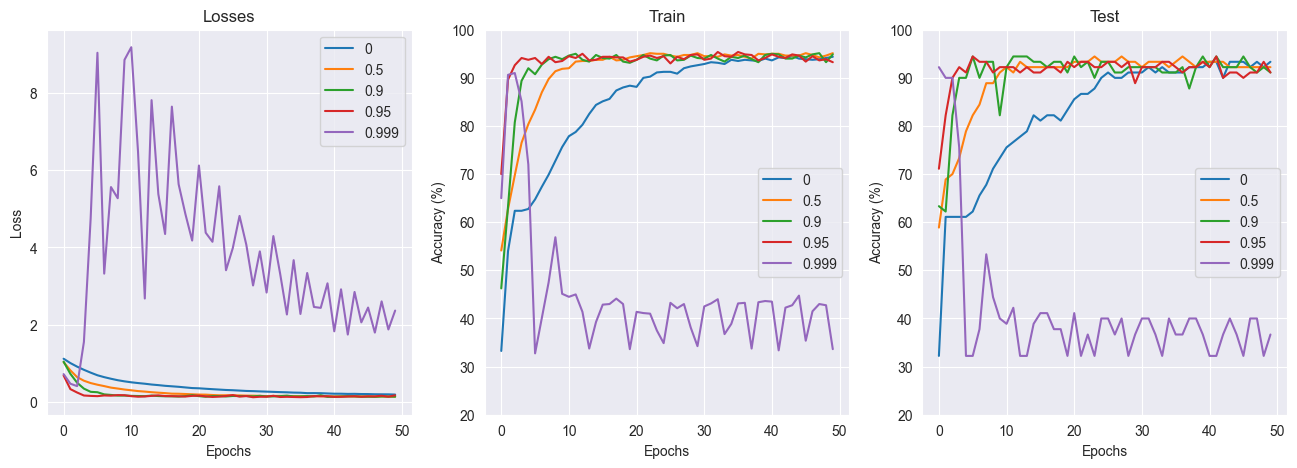

In [73]:
_, ax = plt.subplots(1, 3, figsize=(16, 5))

for i in range(3):
    ax[i].plot(results[:, :, i])
    ax[i].legend(momentums)
    ax[i].set_xlabel('Epochs')

    if i == 0:
        ax[i].set_ylabel('Loss')
    else:
        ax[i].set_ylabel("Accuracy (%)")
        ax[i].set_ylim([20, 100])

ax[0].set_title('Losses')
ax[1].set_title('Train')
ax[2].set_title('Test')

plt.show()

## Optimizers comparison

In [74]:
def create_model(optimizer_name_param):
    class AnnQwerty(nn.Module):
        def __init__(self):
            super().__init__()
            
            self.input = nn.Linear(2, 8)
            self.fully_connected_1 = nn.Linear(8, 8)
            self.output = nn.Linear(8, 3)
            
        def forward(self, x_param):
            x_local = self.input(x_param)
            x_local = F.relu(x_local)
            x_local = self.fully_connected_1(x_local)
            x_local = F.relu(x_local)
            x_local = self.output(x_local)
            
            return x_local
        
    ann_qwerty_local = AnnQwerty()
    loss_function_local = nn.CrossEntropyLoss()
    optimizer_function = getattr(torch.optim, optimizer_name_param)
    optimizer_local = optimizer_function(ann_qwerty_local.parameters(), lr=.01)
    
    return ann_qwerty_local, loss_function_local, optimizer_local

In [75]:
def plot_results(optimizer_name_param, ann_qwerty_param, train_accuracies_param, test_accuracies_param, losses_param):
    y_pred_local = ann_qwerty_param(X)
    accuracy_local = (torch.argmax(y_pred_local, axis=1) == y).float()
    total_accuracy_local = torch.mean(100 * accuracy_local).item()
    accuracy_by_group_local = np.zeros(3)
    
    for i_local in range(3):
        accuracy_by_group_local[i_local] = 100 * torch.mean(accuracy_local[y == i_local])
        
    _, ax_local = plt.subplots(2, 2, figsize=(10, 6))
    
    ax_local[0, 0].plot(losses_param)
    ax_local[0, 0].set_xlabel('Epoch')
    ax_local[0, 0].set_ylabel('Loss')
    ax_local[0, 0].set_title(f"{optimizer_name_param}: Losses")
    
    ax_local[0, 1].plot(train_accuracies_param, label='Train')
    ax_local[0, 1].plot(test_accuracies_param, label='Test')
    ax_local[0, 1].set_xlabel('Epoch')
    ax_local[0, 1].set_ylabel("Accuracy (%)")
    ax_local[0, 1].set_title(f"{optimizer_name_param}: Accuracy")
    
    ax_local[1, 0].bar(range(3), accuracy_by_group)
    ax_local[1, 0].set_ylim([np.min(accuracy_by_group) - 5, np.max(accuracy_by_group) + 5])
    ax_local[1, 0].set_xticks([0, 1, 2])
    ax_local[1, 0].set_xlabel('Group')
    ax_local[1, 0].set_ylabel("Accuracy (%)")
    ax_local[1, 0].set_title(f"{optimizer_name_param}: Accuracy by group")
    
    color_shapes_local = ['bs', 'ko', 'g^']
    
    for i_local in range(3):
        ax_local[1, 1].plot(X[y == i_local, 0], X[y == i_local, 1], color_shapes_local[i_local], alpha=.3, label=f"Group {i_local}")
        error_indices_local = (accuracy_local == 0) & (y == i)
        
        ax_local[1, 1].plot(X[error_indices_local, 0], X[error_indices_local, 1], 'rx')
    
    ax_local[1, 1].set_title(f"{optimizer_name_param}: Total accuracy: {total_accuracy_local:.2f}%")
    ax_local[1, 1].set_xlabel("qwerty dimension 1")
    ax_local[1, 1].set_ylabel("qwerty dimension 2")
    ax_local[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

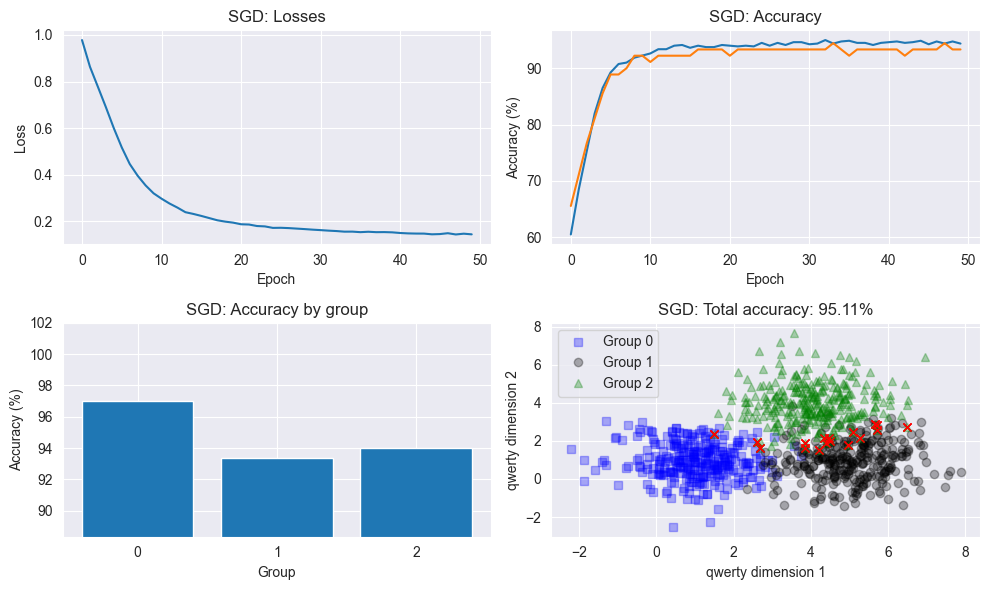

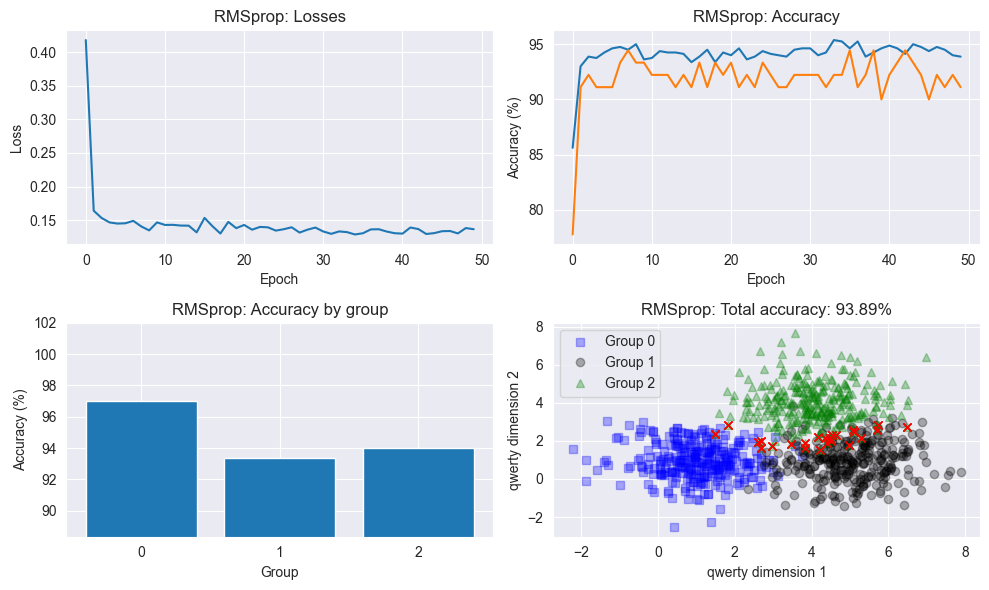

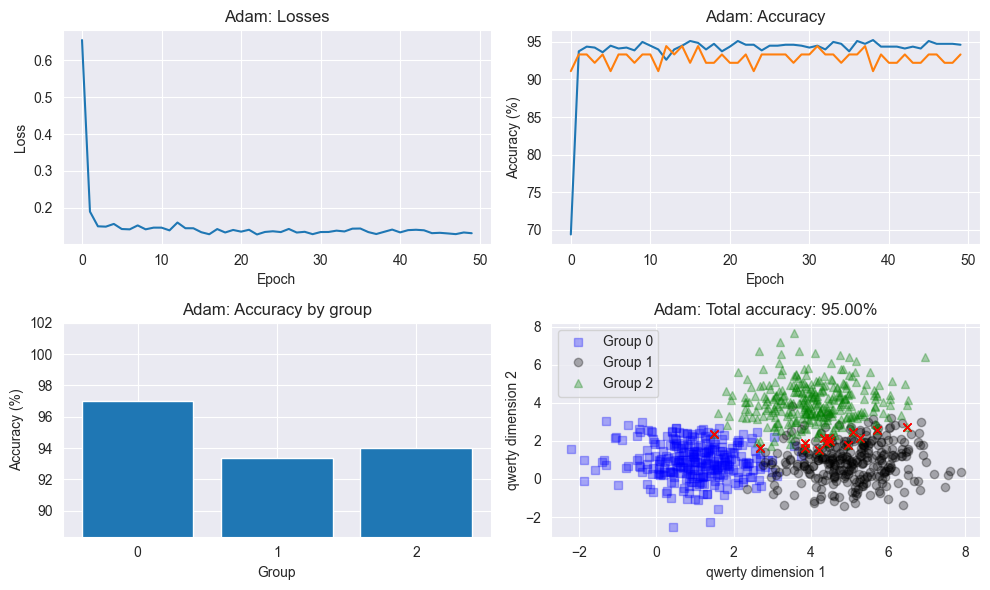

In [76]:
performance = []

for optimizer_name in ['SGD', 'RMSprop', 'Adam']:
    ann_qwerty, loss_function, optimizer = create_model(optimizer_name)
    train_accuracies, test_accuracies, losses = train_model(ann_qwerty, loss_function, optimizer, epochs)
    plot_results(optimizer_name, ann_qwerty, train_accuracies, test_accuracies, losses)
    
    train_accuracies_mean = np.mean(train_accuracies[:10:])
    test_accuracies_mean = np.mean(test_accuracies[:10:])
    
    performance.append(f"{optimizer_name}: train {train_accuracies_mean:.1f}%, test {test_accuracies_mean:.1f}%")

In [77]:
performance

['SGD: train 82.8%, test 83.2%',
 'RMSprop: train 93.3%, test 90.9%',
 'Adam: train 91.7%, test 92.7%']

## CodeChallenge: Optimizers and... something

In [78]:
def create_model(optimizer_name_param, learning_rate_param):
    class AnnQwerty(nn.Module):
        def __init__(self):
            super().__init__()
            
            self.input = nn.Linear(2, 8)
            self.fully_connected_1 = nn.Linear(8, 8)
            self.output = nn.Linear(8, 3)
            
        def forward(self, x_param):
            x_local = self.input(x_param)
            x_local = F.relu(x_local)
            x_local = self.fully_connected_1(x_local)
            x_local = F.relu(x_local)
            x_local = self.output(x_local)
            
            return x_local
        
    ann_qwerty_local = AnnQwerty()
    loss_function_local = nn.CrossEntropyLoss()
    optimizer_function = getattr(torch.optim, optimizer_name_param)
    optimizer_local = optimizer_function(ann_qwerty_local.parameters(), lr=learning_rate_param)
    
    return ann_qwerty_local, loss_function_local, optimizer_local

In [79]:
optimizer_names = ['SGD', 'RMSprop', 'Adam']
learning_rates = np.logspace(-4, -1, 20)
test_accuracies_results = np.zeros((len(learning_rates), len(optimizer_names)))

for i_optimizer, optimizer_name in enumerate(optimizer_names):
    for i_learning_rate, learning_rate in enumerate(learning_rates):
        ann_qwerty, loss_function, optimizer = create_model(optimizer_name, learning_rate)
        _, test_accuracies, _ = train_model(ann_qwerty, loss_function, optimizer, epochs)
    
        test_accuracies_results[i_learning_rate, i_optimizer] = np.mean(test_accuracies[-10:])

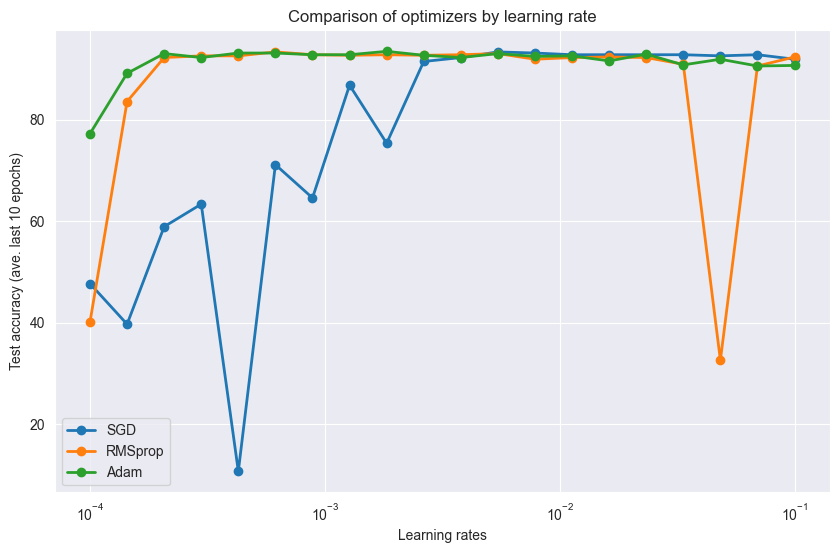

In [80]:
plt.subplots(1, 1, figsize=(10, 6))
plt.plot(learning_rates, test_accuracies_results, 'o-', linewidth=2)
plt.xscale('log')
plt.xlabel("Learning rates")
plt.ylabel("Test accuracy (ave. last 10 epochs)")
plt.title("Comparison of optimizers by learning rate")
plt.legend(labels=optimizer_names)

plt.show()

## CodeChallenge: Adam with L2 regularization

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

X_y_train = TensorDataset(X_train, y_train)
X_y_test = TensorDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(X_y_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(X_y_test, batch_size=X_y_test.tensors[0].shape[0])

In [82]:
def create_model(l2_lambda_param):
    class AnnQwerty(nn.Module):
        def __init__(self):
            super().__init__()
            
            self.input = nn.Linear(2, 8)
            self.fully_connected_1 = nn.Linear(8, 8)
            self.output = nn.Linear(8, 3)
            
        def forward(self, x_param):
            x_local = self.input(x_param)
            x_local = F.relu(x_local)
            x_local = self.fully_connected_1(x_local)
            x_local = F.relu(x_local)
            x_local = self.output(x_local)
            
            return x_local
        
    ann_qwerty_local = AnnQwerty()
    loss_function_local = nn.CrossEntropyLoss()
    optimizer_local = torch.optim.Adam(ann_qwerty_local.parameters(), lr=.001, weight_decay=l2_lambda_param)
    
    return ann_qwerty_local, loss_function_local, optimizer_local

In [83]:
l2_lambdas = np.linspace(0, .1, 6)
train_accuracies_results = np.zeros((epochs, len(l2_lambdas)))
test_accuracies_results = np.zeros((epochs, len(l2_lambdas)))

for i, l2_lambda in enumerate(l2_lambdas):
    ann_qwerty, loss_function, optimizer = create_model(l2_lambda)
    train_accuracies, test_accuracies, _ = train_model(ann_qwerty, loss_function, optimizer, epochs)

    train_accuracies_results[:, i] = train_accuracies
    test_accuracies_results[:, i] = test_accuracies

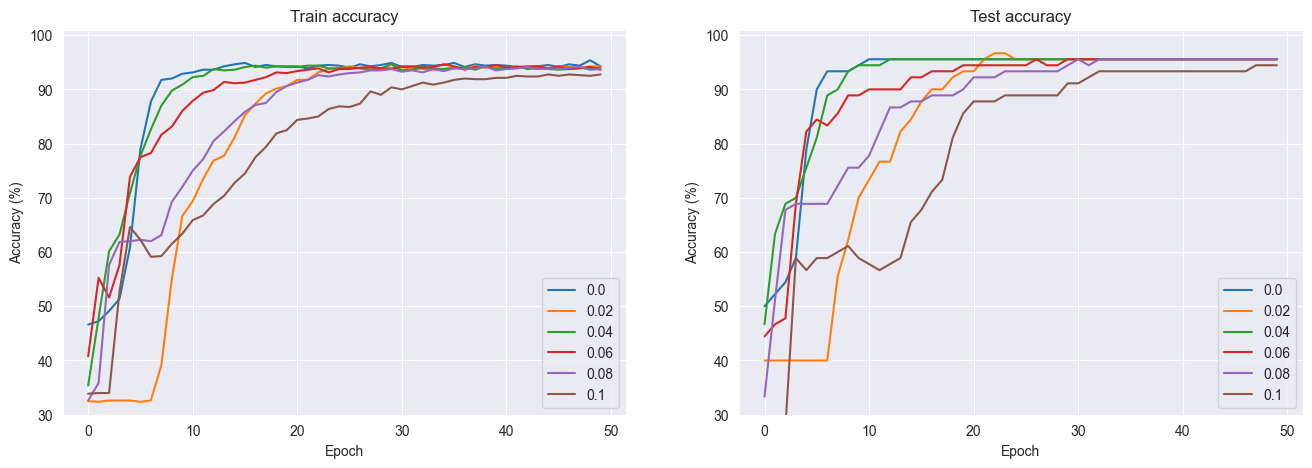

In [84]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(train_accuracies_results)
ax[0].set_ylim([30, 101])
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel("Accuracy (%)")
ax[0].set_title("Train accuracy")
ax[0].legend(l2_lambdas)

ax[1].plot(test_accuracies_results)
ax[1].set_ylim([30, 101])
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_title("Test accuracy")
ax[1].legend(l2_lambdas)

plt.show()

## Learning rate decay

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

X_y_train = TensorDataset(X_train, y_train)
X_y_test = TensorDataset(X_test, y_test)

batch_size = 16
train_loader = DataLoader(X_y_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(X_y_test, batch_size=X_y_test.tensors[0].shape[0])

In [86]:
def create_model(initial_learning_rate):
    class AnnQwerty(nn.Module):
        def __init__(self):
            super().__init__()
            
            self.input = nn.Linear(2, 8)
            self.fully_connected_1 = nn.Linear(8, 8)
            self.output = nn.Linear(8, 3)
            
        def forward(self, x_param):
            x_local = self.input(x_param)
            x_local = F.relu(x_local)
            x_local = self.fully_connected_1(x_local)
            x_local = F.relu(x_local)
            x_local = self.output(x_local)
            
            return x_local
        
    ann_qwerty_local = AnnQwerty()
    loss_function_local = nn.CrossEntropyLoss()
    optimizer_local = torch.optim.SGD(ann_qwerty_local.parameters(), lr=initial_learning_rate)
    step_size = batch_size * len(train_loader)
    scheduler_local = torch.optim.lr_scheduler.StepLR(optimizer_local, step_size=step_size, gamma=.5)
    
    return ann_qwerty_local, loss_function_local, optimizer_local, scheduler_local

In [87]:
ann_qwerty = create_model(.01)[0]
optimizer = torch.optim.SGD(ann_qwerty.parameters(), lr=.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=1/2)

for epoch in range(3):
    for batch_number in range(10):
        print(f"Batch {batch_number}, epoch {epoch}: LR={scheduler.get_last_lr()[0]}")
        
        optimizer.step()
        scheduler.step()

Batch 0, epoch 0: LR=0.01
Batch 1, epoch 0: LR=0.01
Batch 2, epoch 0: LR=0.01
Batch 3, epoch 0: LR=0.01
Batch 4, epoch 0: LR=0.01
Batch 5, epoch 0: LR=0.005
Batch 6, epoch 0: LR=0.005
Batch 7, epoch 0: LR=0.005
Batch 8, epoch 0: LR=0.005
Batch 9, epoch 0: LR=0.005
Batch 0, epoch 1: LR=0.0025
Batch 1, epoch 1: LR=0.0025
Batch 2, epoch 1: LR=0.0025
Batch 3, epoch 1: LR=0.0025
Batch 4, epoch 1: LR=0.0025
Batch 5, epoch 1: LR=0.00125
Batch 6, epoch 1: LR=0.00125
Batch 7, epoch 1: LR=0.00125
Batch 8, epoch 1: LR=0.00125
Batch 9, epoch 1: LR=0.00125
Batch 0, epoch 2: LR=0.000625
Batch 1, epoch 2: LR=0.000625
Batch 2, epoch 2: LR=0.000625
Batch 3, epoch 2: LR=0.000625
Batch 4, epoch 2: LR=0.000625
Batch 5, epoch 2: LR=0.0003125
Batch 6, epoch 2: LR=0.0003125
Batch 7, epoch 2: LR=0.0003125
Batch 8, epoch 2: LR=0.0003125
Batch 9, epoch 2: LR=0.0003125


In [88]:
def train_model(model_param, loss_fun_param, optimizer_param, scheduler_param, toggle_dynamic_lr_param, epochs_param):
     train_accuracies_local = []
     test_accuracies_local = []
     losses_local = []
     learning_rates_local = []
     
     for epoch in range(epochs_param):
          batch_accuracies = []
          batch_losses = []
         
          model_param.train()
         
          for X_local, y_local in train_loader:
               y_pred = model_param(X_local)
               loss = loss_fun_param(y_pred, y_local)
               
               optimizer_param.zero_grad()
               loss.backward()
               optimizer_param.step()
               
               if toggle_dynamic_lr_param:
                   scheduler_param.step()
               
               correct_predictions = (torch.argmax(y_pred, axis=1) == y_local).float()
             
               batch_accuracies.append(100 * torch.mean(correct_predictions).item())
               batch_losses.append(loss.item())
         
          learning_rates_local.append(scheduler.get_last_lr()[0])
          train_accuracies_local.append(np.mean(batch_accuracies))
          losses_local.append(np.mean(batch_losses))
    
          model_param.eval()
          
          X_local, y_local = next(iter(test_loader))
          
          with torch.no_grad():
               y_pred = model_param(X_local)
          
          correct_predictions = (torch.argmax(y_pred, axis=1) == y_local).float()
          
          test_accuracies_local.append(100 * torch.mean(correct_predictions).item())
     
     return train_accuracies_local, test_accuracies_local, losses_local, learning_rates_local

In [89]:
ann_qwerty, loss_function, optimizer, scheduler = create_model(.01)
train_accuracies_dynamic, test_accuracies_dynamic, _, learning_rates_dynamic = train_model(ann_qwerty, loss_function, optimizer, scheduler, True, epochs)

ann_qwerty, loss_function, optimizer, scheduler = create_model(.01)
train_accuracies_static, test_accuracies_static, _, learning_rates_static = train_model(ann_qwerty, loss_function, optimizer, scheduler, False, epochs)

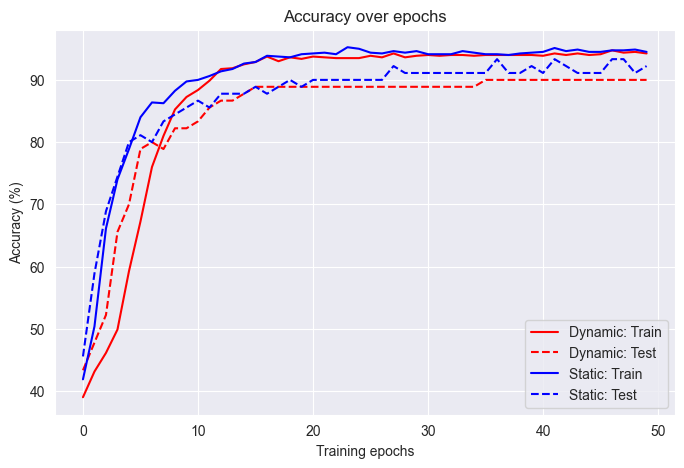

In [90]:
plt.figure(figsize=(8, 5))
plt.plot(train_accuracies_dynamic, 'r', label="Dynamic: Train")
plt.plot(test_accuracies_dynamic, 'r--', label="Dynamic: Test")
plt.plot(train_accuracies_static, 'b', label="Static: Train")
plt.plot(test_accuracies_static, 'b--', label="Static: Test")
plt.xlabel("Training epochs")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy over epochs")
plt.legend()
plt.show()